In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Gdal provide many functionalities, but...

For a number of examples: https://pcjericks.github.io/py-gdalogr-cookbook/raster_layers.html
(indeed, not the *sweetest* implementations)

But it does not align well with `rasterio`...

<div class="alert alert-danger">
    <b>REMEMBER</b>: 
    <ul>
        <li> Do NOT combine `import gdal` and `import rasterio` in the same script/notebook/...
        <li> calling GDAL with a subprocess from the command line is not an issue
    </ul>
</div>

Hence, we do not include the gdal example here...

# Numpy (if you can...)

**Numpy and scipy** are great resources!

Furthermore, lots of useful functions are available for specific actions. For example:

In [5]:
bodem = np.load("../data/nete_bodem.npy") # Should be applied to a real DEM data set...

In [6]:
def shaded_relief(elev, altitude=np.pi/4.,
                  azimuth=np.pi/2.):
    """
    Make a shaded relief version of a numpy array.
    Parameters
    ----------
    dem : 2D numpy array
    altitude : float
        Altitude of sun (in radians)
    azimuth : float
        Direction of sun (in radians)
    """
    x, y = np.gradient(elev)

    slope = np.pi/2. - np.arctan(np.sqrt(x*x + y*y))
    aspect = np.arctan2(-x, y)

    shaded = np.sin(altitude) * np.sin(slope)\
        + np.cos(altitude) * np.cos(slope)\
        * np.cos((azimuth - np.pi/2.) - aspect)
    return shaded

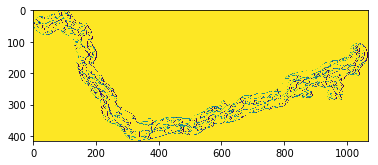

In [7]:
plt.imshow(shaded_relief(bodem))

For a practical example, check the [draft exploration](https://gist.github.com/stijnvanhoey/127ef731b7e51bac6506eec695b58910)  of the **Niche application** submodules `trofie` and `pH`. A more advanced application with **Satellite Images Classification** as topic is provided in [this tutorial](https://www.machinalis.com/blog/python-for-geospatial-data-processing/).

# rasterio is the pythonic implementation specific for rasters

## Reading raster files

In [8]:
import rasterio

In [10]:
with rasterio.open("../scratch/NE1_50M_SR/NE1_50M_SR_Oost_Vlaanderen.tif") as oostvl:
    img = oostvl.read(1)

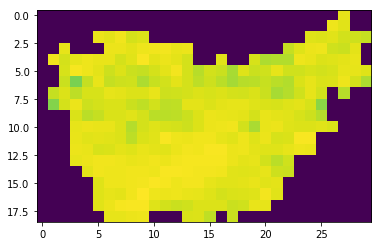

In [11]:
plt.imshow(img)

Again, it easily interacts with numpy arrays:

In [12]:
type(img)

numpy.ndarray

## Example: rasterize vector feature

(Remark, you have to [download the example data](https://github.com/kjordahl/SciPy-Tutorial-2015/blob/master/download_data.py) first and put it in the scratch folder to use this script)

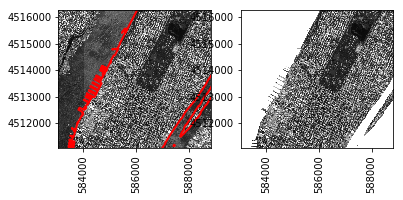

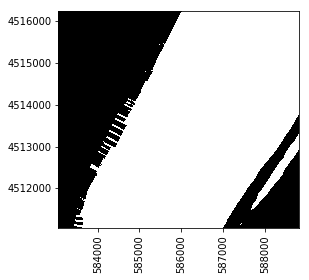

In [13]:
import rasterio
from rasterio.features import rasterize
from geopandas import read_file
import os
import matplotlib.pyplot as plt

data_dir = os.path.join('..', 'scratch', 'data_scipy2015')

raster_file = os.path.join(data_dir, 'manhattan.tif')
vector_file = os.path.join(data_dir, 'nybb_15b', 'nybb.shp')

df = read_file(vector_file)
plt.figure(1)


def show_img(img, bounds):
    left, bottom, right, top = bounds
    plt.imshow(img, cmap='gray', extent=(left, right, bottom, top))
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=90)

with rasterio.open(raster_file) as src:
    # extract Manhattan, transform coordinates and geometry only
    poly = df.to_crs(src.crs).ix[3]['geometry']
    coords = [p.exterior.coords.xy for p in poly]
    ax = plt.subplot(1, 2, 1)
    img = src.read(1)
    show_img(src.read(1), src.bounds)
    for x, y in coords:
        plt.plot(x, y, color='red', linewidth=2)
    ax.set_xlim(src.bounds.left, src.bounds.right)
    ax.set_ylim(src.bounds.bottom, src.bounds.top)
    plt.subplot(1, 2, 2)
    mask = rasterize([poly], transform=src.transform, out_shape=src.shape)
    # If we had opened the file with mode 'r!', we could write the mask
    # src.write_mask(mask)
    img[mask==0] = 255
    show_img(img, src.bounds)

plt.savefig('rasterize_mask.png', dpi=300)
plt.figure(2)
show_img(mask, src.bounds)
plt.savefig('mask.png', dpi=300)

# PCRaster

Furthermore, [**PCRAster**](http://pcraster.geo.uu.nl/pcraster/4.1.0/doc/python/pcraster/quickstart.html) could be worthwhile to check out, it provides fast implementations for a set of typical raster calculations! 

Also PCRAster provides the [interaction with Numpy](http://pcraster.geo.uu.nl/pcraster/4.1.0/doc/python/pcraster/differences.html#converting-to-and-from-numpy-arrays), so you ca easily switch from a numpy array to a native PCRAster object, perform the available functionality and convert the result back to Numpy.

# Data cubes (netCDF)

Once you go to > 2 dimensions, specific Packages are designes to handle these so-called Data-cubes, with a typical focus on meteorology, oceanology or climatology. The following Packages are worthwhile to check:

* [Iris](http://scitools.org.uk/iris/)
* [xarray](http://xarray.pydata.org/en/stable/)

<div class="alert alert-info">
    <b>REMEMBER</b>: 
    <ul>
        <li> Do not hesitate to ask some more information if you're dealing with this type of data!
    </ul>
</div>